In [1]:
from skimage.measure import block_reduce
import numpy as np

import logging
import matplotlib.gridspec as gridspec
from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt

from notebook_utils import plot 
import config

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
from utils import data_provider

In [3]:
dataset_loader = data_provider.DatasetLoader(data_dir='../data')

## Compare_explaination_for_models

In [19]:
def compare_explaination_for_models(method='lrp_deep_taylor', models=['s2', 's3'], seq=7, dataset='mnist', data_idx=[]):
    dataset = dataset_loader.load(dataset)
    n = 50
    if len(data_idx) > 0:
        x, y = dataset.test2d.x[data_idx, :, :], dataset.test2d.y[data_idx, :]
    else:
        x, y = dataset.get_samples_for_vis(n=50)
        
    targets = np.argmax(y, axis=1)
    models = [None]+models
    total_models = len(models)

    fig = plt.figure(figsize=(2, 1))

    outer = gridspec.GridSpec(total_models, 1)

    pred_heatmaps = dict()
    actual_models = list(filter(lambda x: x, models))
    model_info = dict()
    for model in actual_models:
        model_obj = provider.load(model)
        pred_heatmaps[model] = getattr(model_obj, 'rel_%s' % method)(x, y)
        model_info[model] = model_obj._
    count = 1
    for i in range(total_models):

        model = models[i]
        fig = plt.figure(figsize=(1.66*x.shape[0], 2))
        

        for j in range(x.shape[0]):
            plt.subplot(total_models, x.shape[0], count)

            if model is not None:
                heatmap = pred_heatmaps[model][1][j, :, :]

                heatmap = heatmap / (np.abs(heatmap).max() + 1e-10)


                heatmap = plot.make_rgb_heatmap(heatmap)
                title = '%s : %s' % (method, model)

                pred_idx = pred_heatmaps[model][0][j]

                plt.title('Pred %s(%d)' % (dataset.get_text_label(pred_idx), pred_idx))
                cmap = None
                alpha= 0.2 if pred_idx != targets[j] else 1
                suptitle = '%s\n(acc=%.4f)' % (model, model_info[model].accuracy)
            else:
                heatmap = x[j, :]
                pred_idx = pred_heatmaps[actual_models[0]][0][j]

                cmap = 'gist_gray'
                title = '%s(%d)' % (dataset.get_text_label(targets[j]), targets[j])
                plt.title(title)
                alpha = 1
                suptitle = '%s' % method

            plt.imshow(heatmap, cmap=cmap, alpha=alpha)
            plt.xticks([])
            plt.yticks([])
            count = count + 1

        plt.suptitle(suptitle)

    plt.show()
    
def compare_explaination_for_dataset(method, models, dataset, seq, data_idx):
    
    compare_explaination_for_models(method,
                                    seq=seq,
                                    dataset=dataset,
                                    models=[ '../final-models/%s_network-%s-seq-%d' % (m, dataset, seq) for m in models],
                                    data_idx=data_idx
                                   )


[7948, 4645, 2290, 1792, 1516, 1759, 49, 7812, 1971, 4959, 2308, 319]


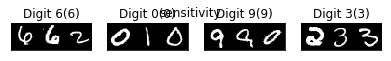

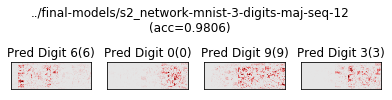

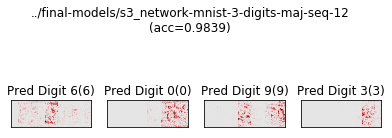

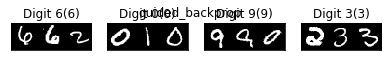

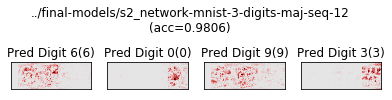

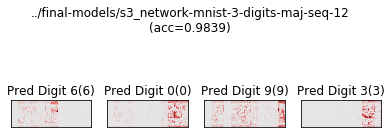

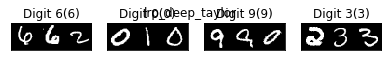

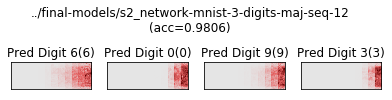

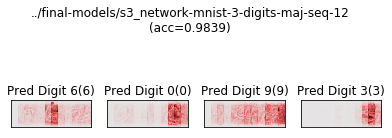

In [89]:
rd = list(np.random.choice(10000, 12))
selected = [22, 5069, 99, 334, 5004] + rd
print(rd)
for med in ['sensitivity', 'guided_backprop', 'lrp_deep_taylor']:
    compare_explaination_for_dataset(med, models=['s2', 's3'],
                                     dataset='mnist-3-digits-maj', seq=12,
                                     data_idx=selected[:4])

[6159  983 9705  861  657 6311 7522 7471 6274 1555 2228 6797]


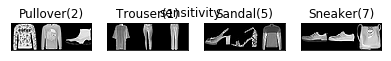

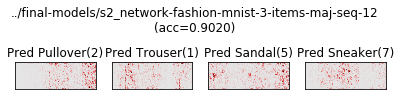

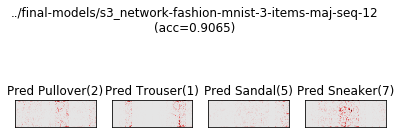

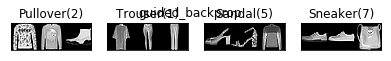

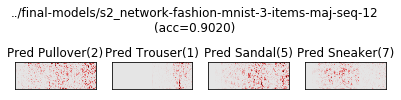

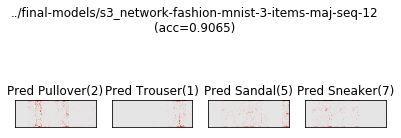

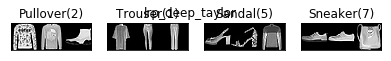

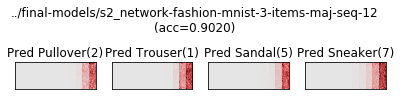

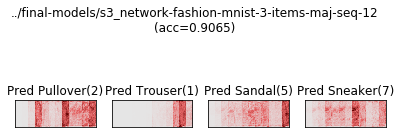

In [90]:
dd = np.random.choice(10000, 12)

selected = [7639, 863, 559, 1752, 7954, 9238] + list(dd)
print(dd)
for med in ['sensitivity', 'guided_backprop', 'lrp_deep_taylor']:
    compare_explaination_for_dataset(med, models=['s2', 's3'],
                                     dataset='fashion-mnist-3-items-maj', seq=12,
                                     data_idx=selected[:4])

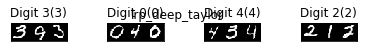

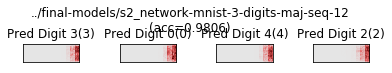

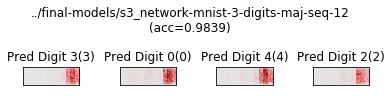

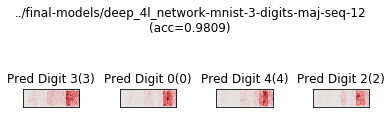

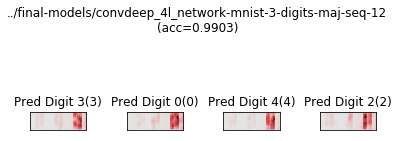

In [81]:
        
compare_explaination_for_models('lrp_deep_taylor',
                                seq=12,
                                dataset='mnist-3-digits-maj',
                                data_idx=[9192,3,4, 5127],
                                models=[
                                    '../final-models/s2_network-mnist-3-digits-maj-seq-12',
                                    '../final-models/s3_network-mnist-3-digits-maj-seq-12',
                                  '../final-models/deep_4l_network-mnist-3-digits-maj-seq-12',
                                    '../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12',
#                                     '../experiment-results/models-for-paper/convdeep_gated_network-mnist-3-digits-maj-seq-12---2018-02-19--00-31-15'
                                ])

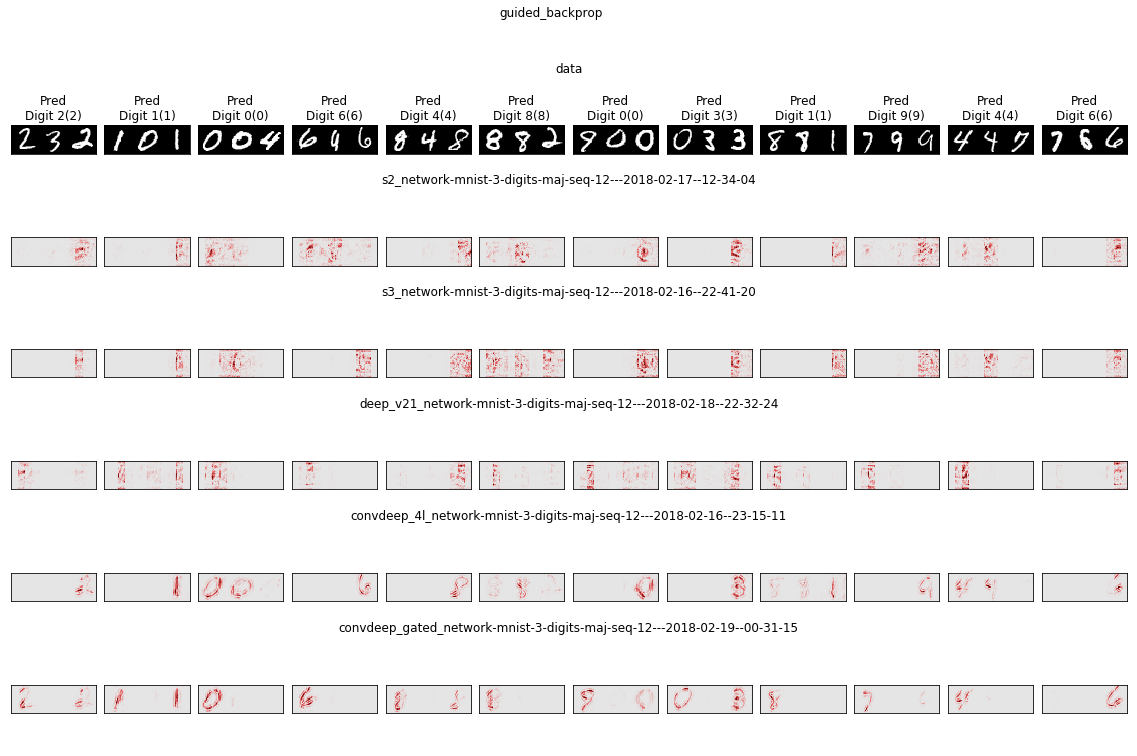

In [49]:
compare_explaination_for_models('guided_backprop',
                                seq=12,
                                dataset='mnist-3-digits-maj',
#                                 data_idx=m3d_8,
                                models=[
                                    '../final-models/s2_network-mnist-3-digits-maj-seq-12',
                                    '../final-models/s3_network-mnist-3-digits-maj-seq-12',
                                    '../experiment-results/models-for-paper/deep_v21_network-mnist-3-digits-maj-seq-12---2018-02-18--22-32-24',
                                    '../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12',
                                    '../experiment-results/models-for-paper/convdeep_gated_network-mnist-3-digits-maj-seq-12---2018-02-19--00-31-15'
                                ])

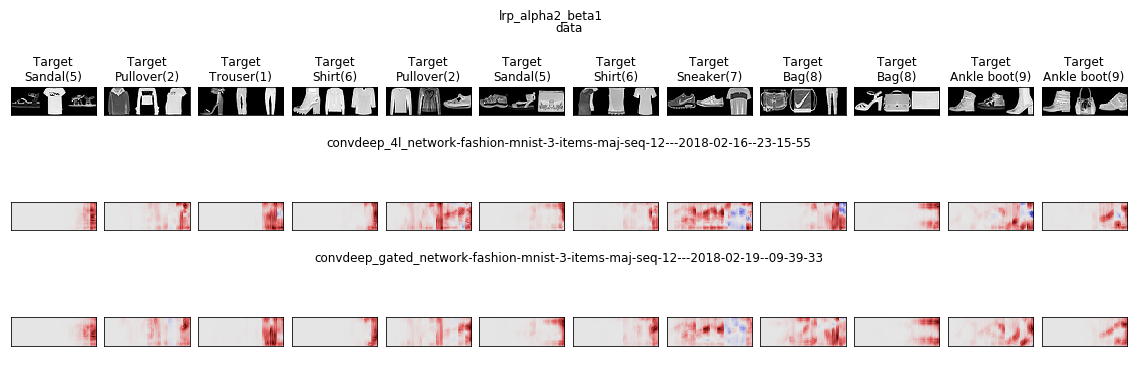

In [59]:
        
compare_explaination_for_models('lrp_alpha2_beta1',
                                seq=12,
                                dataset='fashion-mnist-3-items-maj',
                                models=[
                                    '../final-models/convdeep_4l_network-fashion-mnist-3-items-maj-seq-12',
                                    '../experiment-results/models-for-paper/convdeep_gated_network-fashion-mnist-3-items-maj-seq-12---2018-02-19--09-39-33'
                                ])

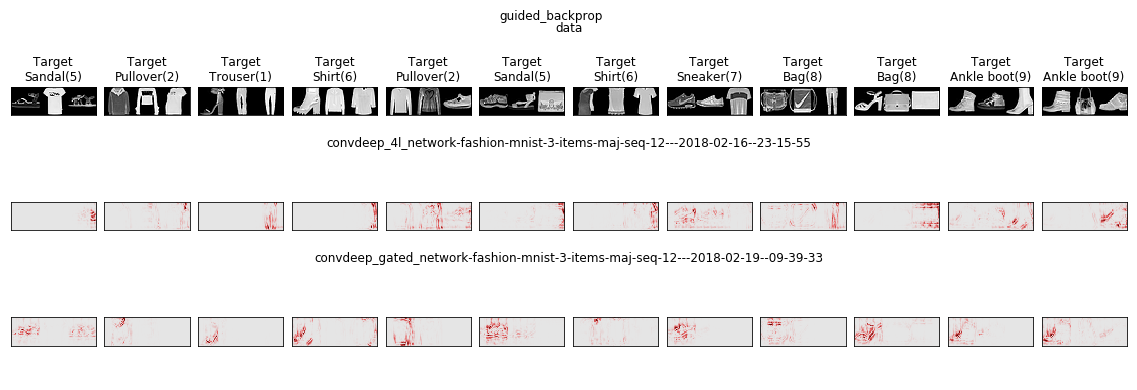

In [60]:
        
compare_explaination_for_models('guided_backprop',
                                seq=12,
                                dataset='fashion-mnist-3-items-maj',
                                models=[t
                                    '../final-models/convdeep_4l_network-fashion-mnist-3-items-maj-seq-12',
                                    '../experiment-results/models-for-paper/convdeep_gated_network-fashion-mnist-3-items-maj-seq-12---2018-02-19--09-39-33'
                                ])

## Plot Explanation Grid

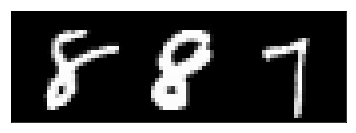

ValueError: Colormap grey_gist is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [82]:
def plot_explanation_grid_of_sample(dataset, seq, data_idx, methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor'],
                                     models=['s2', 's3', 'deep_4l', 'convdeep_4l'], ):
    
    data = dataset_loader.load(dataset)
    x, y = data.test2d.x[data_idx, :, :], data.test2d.y[data_idx, :]
    
    plot_digit(x)
    
    x = x.reshape(1, x.shape[0], x.shape[1])
    y = y.reshape(1,-1)
    
    results = dict()
    
    
    for mod in models:
        model_path = '../final-models/%s_network-%s-seq-%d' % (mod, dataset, seq)
        model_obj = provider.load(model_path)
        model_result = dict()
        for met in methods:
            _, model_result[met] = getattr(model_obj, 'rel_%s' % met)(x, y)
            
        results[mod] = model_result
    fig = plt.figure(figsize=(1.66*len(models), 0.5 * len(methods)))
    outer = gridspec.GridSpec(len(methods), 1)
    
    for i, met in enumerate(methods):
        inner = gridspec.GridSpecFromSubplotSpec(1, len(models),
                                                 subplot_spec=outer[i], wspace=0.1, hspace=0.05)

        method = met

        for j in range(len(models)):
            ax = plt.Subplot(fig, inner[j])
            
#             heatmap = plot.norm_and_make_rgb_heatmap()
            heatmap = np.squeeze(results[models[j]][met])

            heatmap = heatmap / (np.abs(heatmap).max() + 1e-10)
            heatmap = plot.make_rgb_heatmap(heatmap)
            ax.imshow(heatmap)
            ax.set_xticks([])
            ax.set_yticks([])

            fig.add_subplot(ax)

        ax_outer = plt.Subplot(fig, outer[i])

        ax_outer._frameon = False
        ax_outer.xaxis.set_visible(False)
        ax_outer.yaxis.set_visible(False)
        fig.add_subplot(ax_outer)

    plt.show()
    

def plot_digit(x):
    plt.imshow(x, cmap='gist_gray')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.show()
    
plot_explanation_grid_of_sample('mnist-3-digits-maj', 12, 7941)

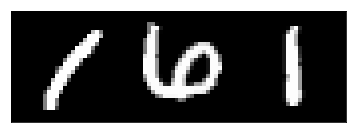

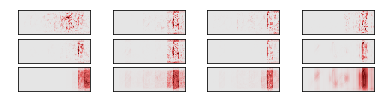

In [52]:
plot_explanation_grid_of_sample('mnist-3-digits-maj', 12, 9190)

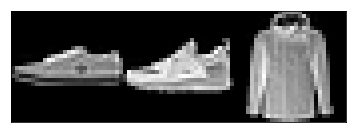

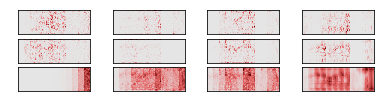

In [45]:
plot_explanation_grid_of_sample('fashion-mnist-3-items-maj', 12, 5503)

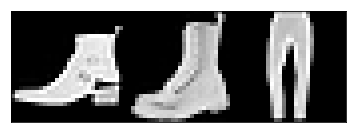

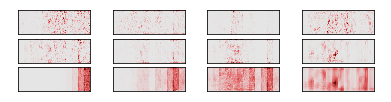

In [46]:
plot_explanation_grid_of_sample('fashion-mnist-3-items-maj', 12, 7954)

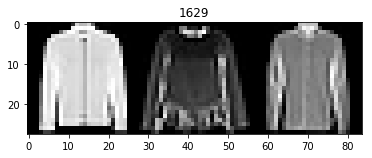

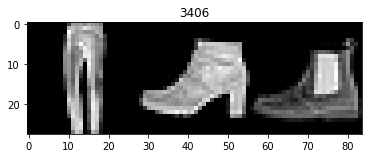

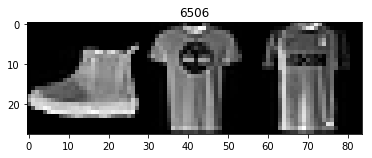

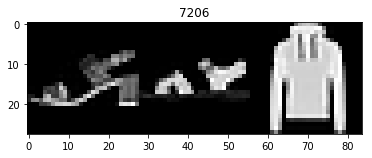

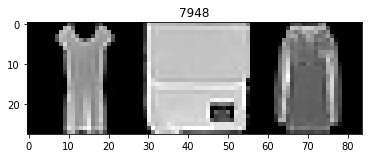

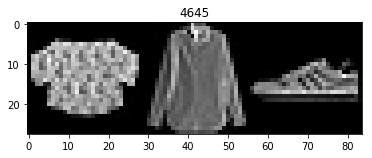

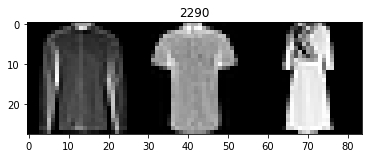

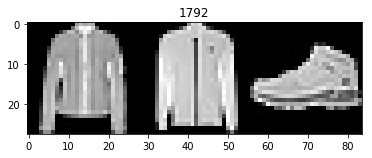

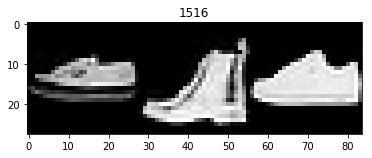

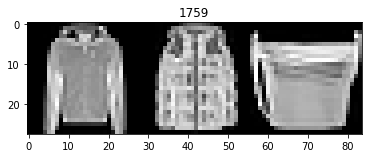

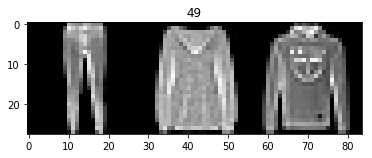

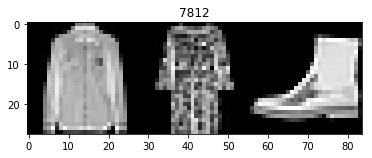

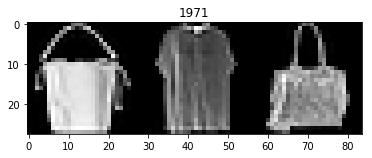

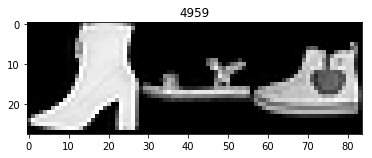

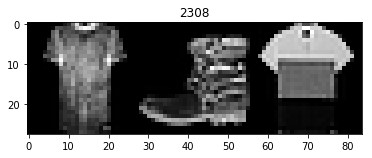

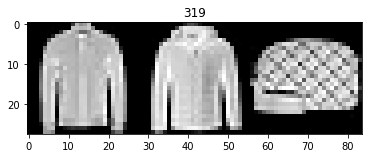

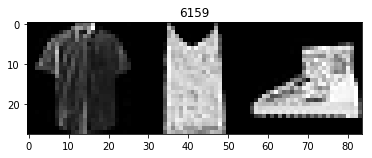

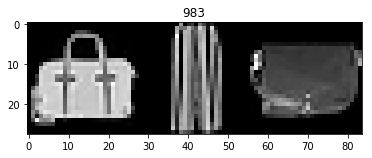

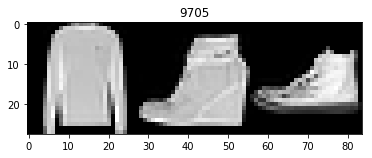

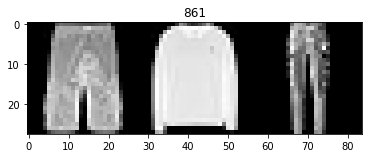

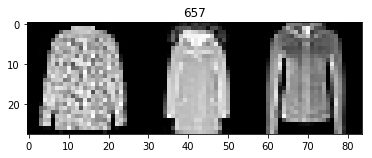

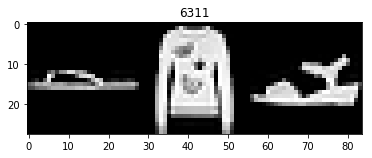

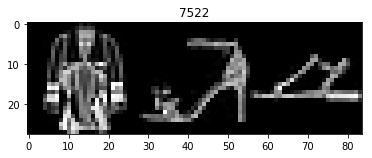

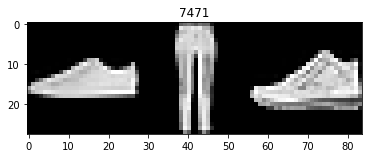

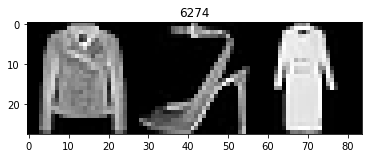

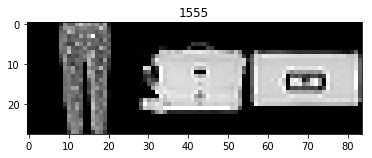

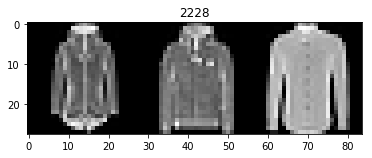

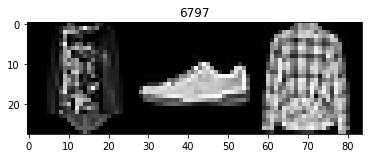

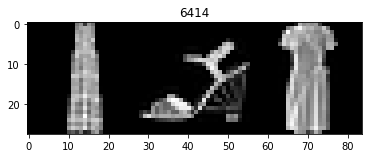

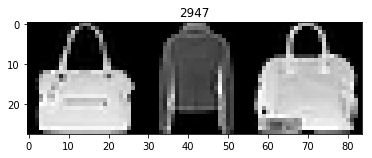

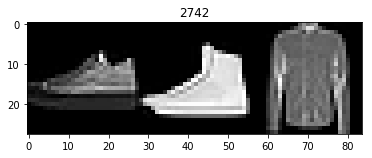

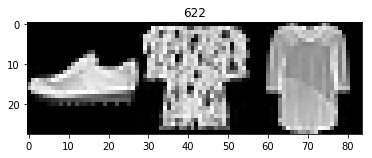

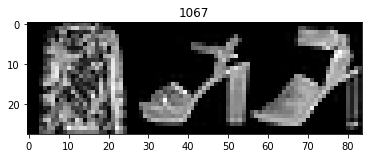

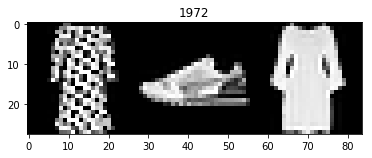

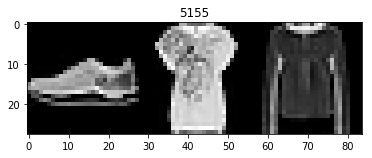

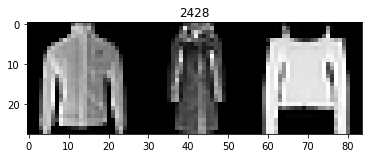

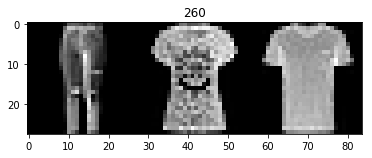

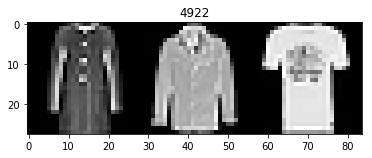

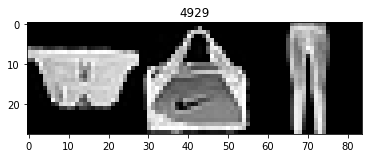

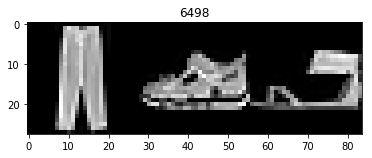

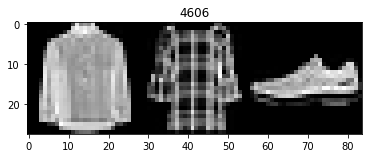

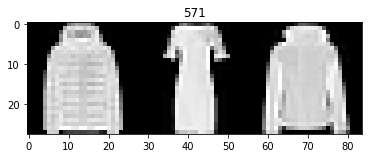

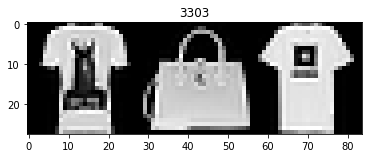

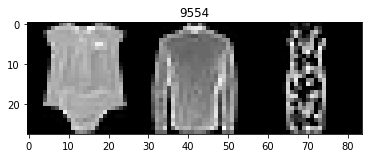

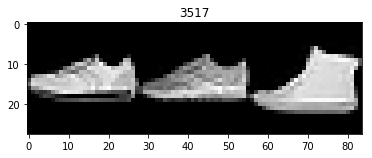

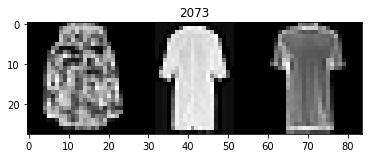

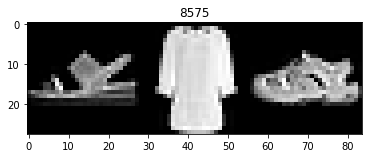

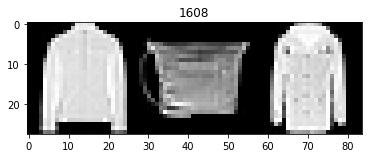

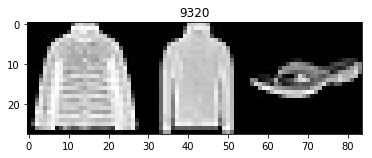

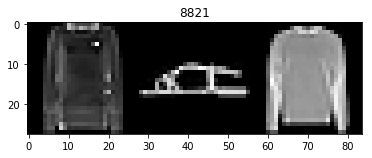

In [67]:
for idx in np.random.choice(10000, 50):
    plt.imshow(dataset_loader.load('fashion-mnist-3-items-maj').test2d.x[idx, :, :], cmap='gray')
    plt.title(idx)
    plt.show()
# [1932, 8026, 3845, 3287, 5503, 152, 1875]

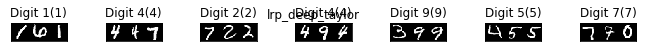

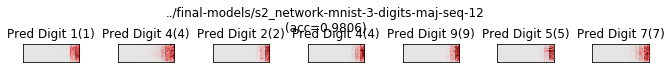

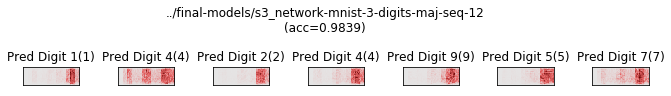

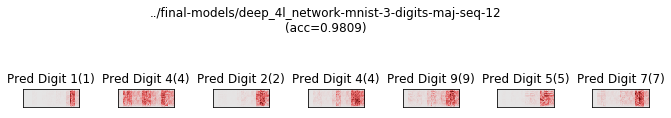

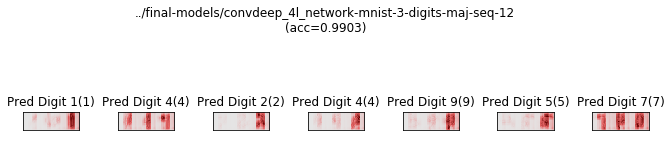

In [51]:

def show_xx(dataset):
    compare_explaination_for_models('lrp_deep_taylor',
                                    seq=12,
                                    dataset=dataset,
                                    data_idx=[9190, 7361, 738, 1159, 5503, 152, 1875],
                                    models=[
                                        '../final-models/s2_network-%s-seq-12' % dataset,
                                        '../final-models/s3_network-%s-seq-12' % dataset,
                                        '../final-models/deep_4l_network-%s-seq-12' % dataset,
                                        '../final-models/convdeep_4l_network-%s-seq-12' % dataset,
                                    ])
show_xx('mnist-3-digits-maj')

## Plot samples for a model

In [77]:
def plot_digits(data, title=""):
    plt.figure(figsize=(80,20))
#     plt.figure(figsize=(1.66*data.shape[0], 0.5))

    for i in range(data.shape[0]):
        plt.subplot(4,16, i+1)
        plt.imshow(data[i,:,:], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    if title:
        plt.suptitle(title)
    plt.show()

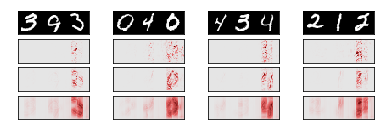

In [85]:
def plot_explanation_grid_of_samples_for_a_model(model, dataset, seq, data_idx=[9192,3,4, 5, 55, 660], 
                                                 methods=['sensitivity', 'guided_backprop', 'lrp_deep_taylor'],
                                                ):
    
    data = dataset_loader.load(dataset)
    x, y = data.test2d.x[data_idx, :, :], data.test2d.y[data_idx, :]
    targets = np.argmax(y, axis=1)
#     plot_digits(x)
    
    results = dict()
    
    
    model_path = '../final-models/%s_network-%s-seq-%d' % (model, dataset, seq)
    model_obj = provider.load(model_path)
    results = dict()
    for met in methods:
        preds, results[met] = getattr(model_obj, 'rel_%s' % met)(x, y)
            
    fig = plt.figure(figsize=(1.66*x.shape[0], 0.5 * (len(methods)+1)))
    outer = gridspec.GridSpec(len(methods)+1, 1)
    
    for i, met in enumerate([None] + methods):
        inner = gridspec.GridSpecFromSubplotSpec(1, x.shape[0],
                                                 subplot_spec=outer[i], wspace=0.1, hspace=0.05)

        method = met

        for j in range(x.shape[0]):
            ax = plt.Subplot(fig, inner[j])
            
            if i == 0:
                ax.imshow(x[j], cmap='gist_gray')
                ax.set_xticks([])
                ax.set_yticks([])

            else:
                heatmap = np.squeeze(results[met][j])

                heatmap = heatmap / (np.abs(heatmap).max() + 1e-10)
                heatmap = plot.make_rgb_heatmap(heatmap)

                ax.imshow(heatmap, alpha = 0.2 if preds[j] != targets[j] else 1)
                ax.set_xticks([])
                ax.set_yticks([])

            fig.add_subplot(ax)

        ax_outer = plt.Subplot(fig, outer[i])

        ax_outer._frameon = False
        ax_outer.xaxis.set_visible(False)
        ax_outer.yaxis.set_visible(False)
        fig.add_subplot(ax_outer)

    plt.show()
plot_explanation_grid_of_samples_for_a_model('convdeep_4l', 'mnist-3-digits-maj', 12, data_idx = [9192,3,4, 5127])

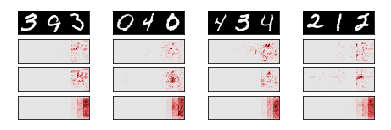

In [86]:
plot_explanation_grid_of_samples_for_a_model('s2', 'mnist-3-digits-maj', 12, data_idx = [9192,3,4, 5127])

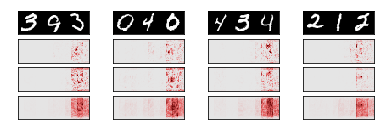

In [87]:
plot_explanation_grid_of_samples_for_a_model('s3', 'mnist-3-digits-maj', 12, data_idx = [9192,3,4, 5127])

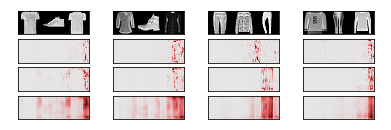

In [88]:
plot_explanation_grid_of_samples_for_a_model('convdeep_4l', 'fashion-mnist-3-items-maj', 12, data_idx = [9192,4, 5127, 99])

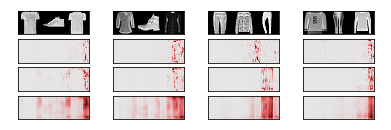

In [89]:
plot_explanation_grid_of_samples_for_a_model('convdeep_4l', 'fashion-mnist-3-items-maj', 12, data_idx = [9192,4, 5127, 99])

In [35]:
def get_data_idx_for_class(data_name, class_idx, no=50, seed=2):
    np.random.seed(seed)

    data = dataset_loader.load(data_name)
    indices = np.argwhere(np.argmax(data.test2d.y, axis=1) == class_idx).reshape(-1)
    np.random.seed(seed)
    
    return np.random.choice(indices, no)
m3d_8 = get_data_idx_for_class('mnist-3-digits', 8, no=20)

In [4]:
def get_data_for_class(data_name, class_idx, no=16, seed=2):
    np.random.seed(seed)

    data = dataset_loader.load(data_name)
    indices = np.argmax(data.test2d.y, axis=1) == class_idx
    if no:
        s = np.random.choice(np.sum(indices), size=no, replace=False)
        return data.test2d.x[indices,:,:][s, :, :], data.test2d.y[indices, :][s, :]
    else:
        return data.test2d.x[indices,:,:]

In [6]:
# mnist_8_x, mnist_8_y = get_data_for_class('mnist-3-digits', 8, no=16)
# mnist_maj_8_x, mnist_maj_8_y = get_data_for_class('mnist-3-digits-maj', 8, no=16)

# mnist_9_x, mnist_9_y = get_data_for_class('mnist-3-digits', 9, no=16)
# mnist_maj_9_x, mnist_maj_9_y = get_data_for_class('mnist-3-digits-maj', 9, no=16)

# # mnist_9_maj = get_data_for_class('mnist-3-digits-maj', 9)
# # fmnist_ankle_boots = get_data_for_class('fashion-mnist-3-items', 9)

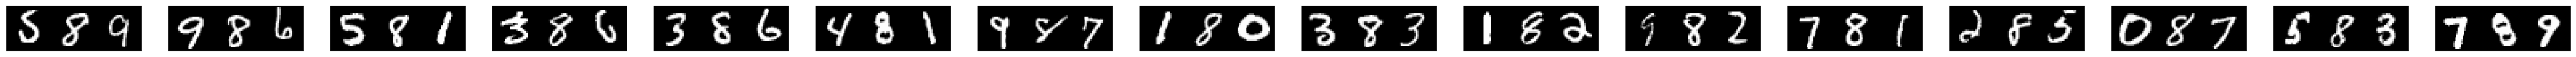

In [7]:
plot_digits(get_data_for_class('mnist-3-digits', 8, no=16)[0])

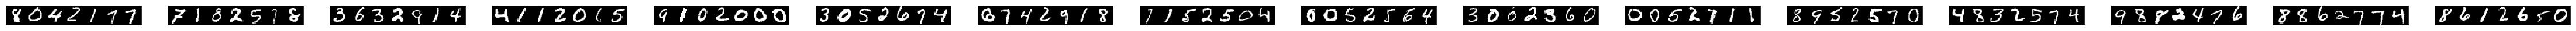

In [18]:
plot_digits(get_data_for_class('mnist-7-digits', 2, no=16)[0])

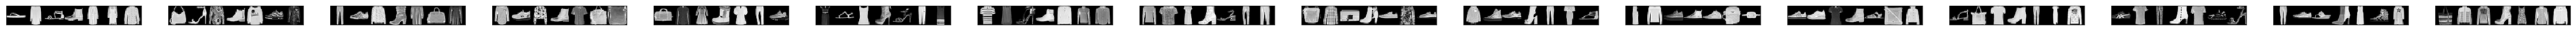

In [9]:
plot_digits(get_data_for_class('fashion-mnist-7-items', 9, no=16)[0])

In [15]:
dd = dataset_loader.load('fashion-mnist-7-items')

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [12]:
# for i in range(10):
#     plot.plot_relevance_methods('../final-models/convdeep_4l_network-mnist-3-digits-maj-seq-12', dataset_loader, data=get_data_for_class('mnist-3-digits-maj', i, no=16), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

In [13]:
# for i in range(10):
#     plot.plot_relevance_methods('../experiment-results/models-for-paper/convdeep_gated_network-mnist-3-digits-maj-seq-12---2018-02-19--00-31-15', dataset_loader, data=get_data_for_class('mnist-3-digits-maj', i, no=16), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

In [14]:
plot.plot_relevance_methods('../final-models/convdeep_4l_network-mnist-3-digits-seq-12', dataset_loader, data=(mnist_8_x, mnist_8_y), only_positive_rel=True, methods=['sensitivity', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_deep_taylor'])

NameError: name 'mnist_8_x' is not defined